In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from lego_data.cleaning_map_utils import (
    read_world_df()
)


##### Data from https://www.kaggle.com/datasets/mterzolo/lego-sets

In [3]:
# import lego data
lego_df = pd.read_csv("lego_sets.csv")
lego_df.head(1)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US


In [4]:
# load the low resolution world map
world_df = read_world_df()
world_df.head(1)

/var/folders/yl/35nlmbks77j8wtkr5tb7s5yr0000gn/T/ipykernel_919/886822188.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


### Median price per country

In [6]:
median_price = lego_df.groupby(['country'])[['list_price']].median().reset_index()
name_mapping = generate_mapping_country_name(
    median_price,
    world_df
)

In [7]:
median_price['iso_a3'] = median_price['country'].replace(name_mapping)
median_price.head(1)

,country,list_price,iso_a3
0,AT,36.5878,ATF


In [8]:
merge_df = world_df.merge(median_price, on = ['iso_a3'])

Text(0.5, 1.0, 'Lego median list price per country')

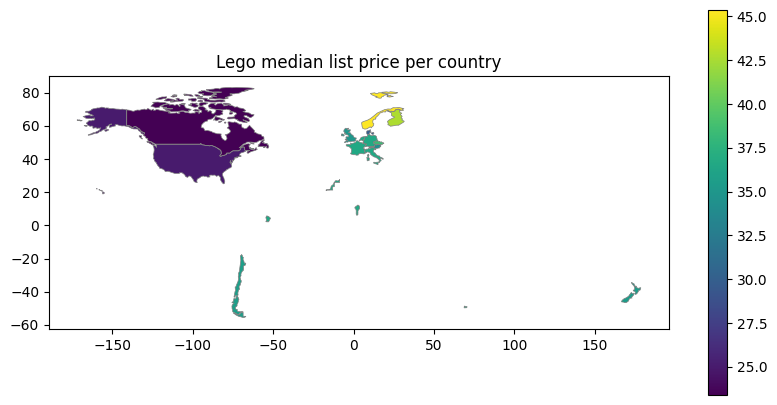

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
merge_df.boundary.plot(ax=ax, linewidth=0.5, color="grey", facecolor=None)
merge_df.plot(column='list_price', 
              legend=True,
              ax=ax)
plt.title("Lego median list price per country")

### Median piece counts

In [10]:
piece_count_df = lego_df.groupby(['country'])[['piece_count']].median().reset_index()
name_mapping = generate_mapping_country_name(
    piece_count_df,
    world_df
)

In [11]:
piece_count_df['iso_a3'] = piece_count_df['country'].replace(name_mapping)
piece_count_df.head(1)

,country,piece_count,iso_a3
0,AT,213.0,ATF


In [13]:
merge_df = world_df.merge(piece_count_df, on = ['iso_a3'])

Text(0.5, 1.0, 'Lego median piece_count per country')

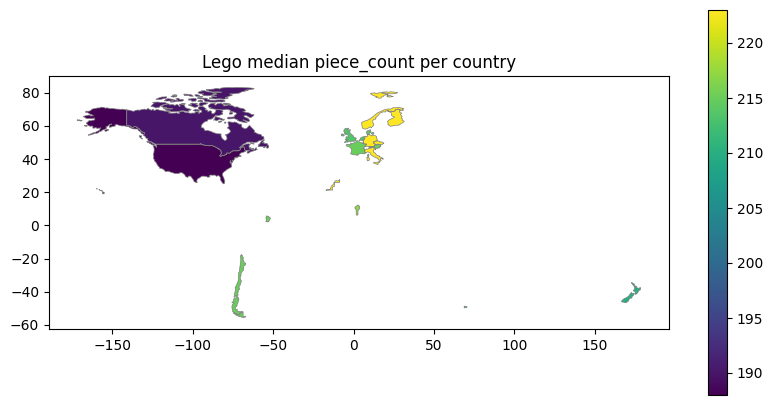

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
merge_df.boundary.plot(ax=ax, linewidth=0.5, color="grey", facecolor=None)
merge_df.plot(column='piece_count', 
              legend=True,
              ax=ax)
plt.title("Lego median piece_count per country")